<a href="https://colab.research.google.com/github/devodita/My_ML/blob/SVM/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

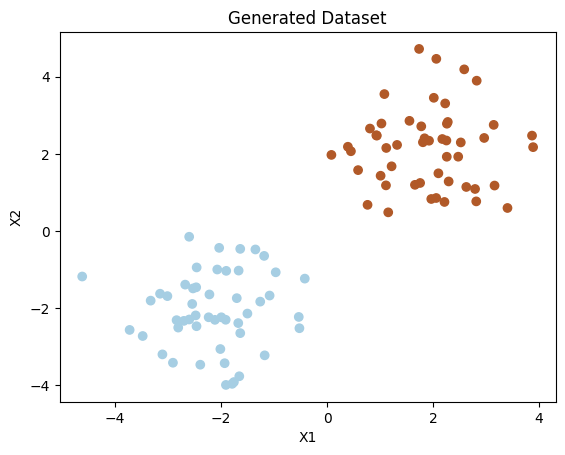

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(42)

# Class 0
class_0 = np.random.randn(50, 2) - [2, 2]

# Class 1
class_1 = np.random.randn(50, 2) + [2, 2]

# Create a DataFrame
data = pd.DataFrame(np.vstack([class_0, class_1]), columns=['X1', 'X2'])
data['y'] = np.array([0] * 50 + [1] * 50)

# Visualize the dataset
plt.scatter(data['X1'], data['X2'], c=data['y'], cmap=plt.cm.Paired, marker='o')
plt.title('Generated Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


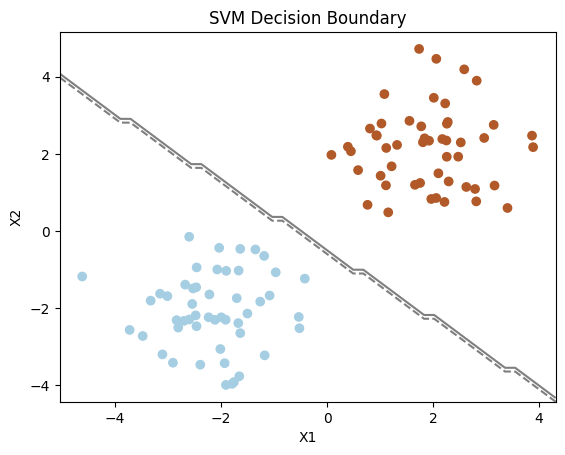

In [11]:
class SVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Training the SVM using Gradient Descent
        for epoch in range(self.num_epochs):
            # Calculate decision function
            decision_function = np.dot(X, self.weights) + self.bias

            # Calculate hinge loss
            hinge_loss = 1 - y * decision_function

            # Update weights and bias using gradient descent
            mask = hinge_loss > 0
            gradient_weights = -np.dot(X[mask].T, y[mask])
            gradient_bias = -np.sum(y[mask])
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        # Decision function
        decision_function = np.dot(X, self.weights) + self.bias
        # Predictions (1 for positive class, -1 for negative class)
        return np.sign(decision_function)

# Prepare the data
X = data[['X1', 'X2']].values
y = data['y'].values

# Instantiate and train the SVM model
svm_model = SVM()
svm_model.fit(X, y)

# Visualize the decision boundary
plt.scatter(data['X1'], data['X2'], c=data['y'], cmap=plt.cm.Paired, marker='o')
plt.title('SVM Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()
